Confusion Matrix:
 [[86 19]
 [37 37]]
Accuracy: 0.6871508379888268


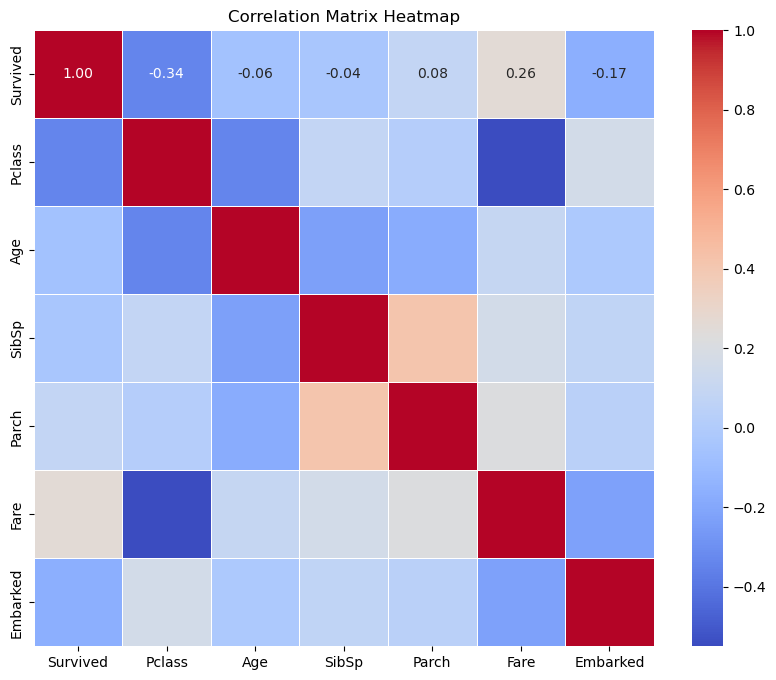

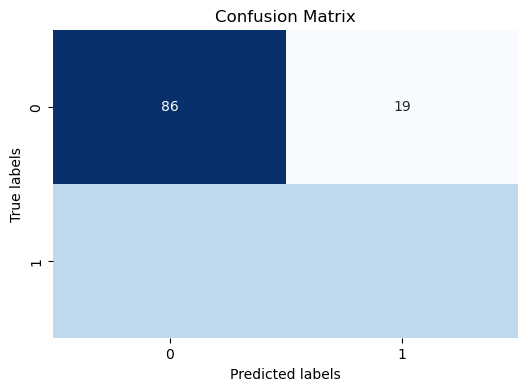

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("TitanicDataset.csv")
df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']] 
df['Age'].fillna(df['Age'].median(), inplace=True) 
df['Fare'].fillna(df['Fare'].median(), inplace=True) 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}) 

train, test = train_test_split(df, test_size=0.2, random_state=42)

X_train = train.drop('Survived', axis=1) 
y_train = train['Survived']
X_test = test.drop('Survived', axis=1) 
y_test = test['Survived']

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()